<a href="https://colab.research.google.com/github/harnalashok/timeseries/blob/main/exponential_smoothing_statsmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 4th March, 2023
# Ref: Examples from statsmodel github site:
#      https://github.com/statsmodels/statsmodels/tree/main/examples/notebooks

# Exponential smoothing

Let us consider chapter 7 of the excellent treatise on the subject of Exponential Smoothing By Hyndman and Athanasopoulos [1].
We will work through all the examples in the chapter as they unfold.

[1] [Hyndman, Rob J., and George Athanasopoulos. Forecasting: principles and practice. OTexts, 2014.](https://www.otexts.org/fpp/7)

## Call libraries



In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
%matplotlib inline

In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Load data
First we load some data. We have included the R data in the notebook for expedience.

In [6]:
# These are data from R package as used in the book"

data = [
    446.6565,
    454.4733,
    455.663,
    423.6322,
    456.2713,
    440.5881,
    425.3325,
    485.1494,
    506.0482,
    526.792,
    514.2689,
    494.211,
]

# Freq is annual
index = pd.date_range(start="1996", end="2008", freq="A")
oildata = pd.Series(data, index)
oildata.head()
print("\n===========\n")
oildata.tail()   # upto 31st Dec, 2007

1996-12-31    446.6565
1997-12-31    454.4733
1998-12-31    455.6630
1999-12-31    423.6322
2000-12-31    456.2713
Freq: A-DEC, dtype: float64

2003-12-31    485.1494
2004-12-31    506.0482
2005-12-31    526.7920
2006-12-31    514.2689
2007-12-31    494.2110
Freq: A-DEC, dtype: float64

In [7]:
data = [
    17.5534,
    21.86,
    23.8866,
    26.9293,
    26.8885,
    28.8314,
    30.0751,
    30.9535,
    30.1857,
    31.5797,
    32.5776,
    33.4774,
    39.0216,
    41.3864,
    41.5966,
]

# Freq is annual
index = pd.date_range(start="1990", end="2005", freq="A")
air = pd.Series(data, index)
air.head()

1990-12-31    17.5534
1991-12-31    21.8600
1992-12-31    23.8866
1993-12-31    26.9293
1994-12-31    26.8885
Freq: A-DEC, dtype: float64

In [8]:

data = [
    263.9177,
    268.3072,
    260.6626,
    266.6394,
    277.5158,
    283.834,
    290.309,
    292.4742,
    300.8307,
    309.2867,
    318.3311,
    329.3724,
    338.884,
    339.2441,
    328.6006,
    314.2554,
    314.4597,
    321.4138,
    329.7893,
    346.3852,
    352.2979,
    348.3705,
    417.5629,
    417.1236,
    417.7495,
    412.2339,
    411.9468,
    394.6971,
    401.4993,
    408.2705,
    414.2428,
]

index = pd.date_range(start="1970", end="2001", freq="A")
livestock2 = pd.Series(data, index)
livestock2.head()

1970-12-31    263.9177
1971-12-31    268.3072
1972-12-31    260.6626
1973-12-31    266.6394
1974-12-31    277.5158
Freq: A-DEC, dtype: float64

In [9]:
data = [407.9979, 403.4608, 413.8249, 428.105, 445.3387, 452.9942, 455.7402]
index = pd.date_range(start="2001", end="2008", freq="A")
livestock3 = pd.Series(data, index)

data = [
    41.7275,
    24.0418,
    32.3281,
    37.3287,
    46.2132,
    29.3463,
    36.4829,
    42.9777,
    48.9015,
    31.1802,
    37.7179,
    40.4202,
    51.2069,
    31.8872,
    40.9783,
    43.7725,
    55.5586,
    33.8509,
    42.0764,
    45.6423,
    59.7668,
    35.1919,
    44.3197,
    47.9137,
]
# Using pandas offset aliases and Anchored offset aliases:
# StackOverflow: https://stackoverflow.com/a/35339226
index = pd.date_range(start="2005", end="2010-Q4", freq="QS-OCT")
aust = pd.Series(data, index)
aust.head()
print("\n===========\n")
aust.tail()

2005-01-01    41.7275
2005-04-01    24.0418
2005-07-01    32.3281
2005-10-01    37.3287
2006-01-01    46.2132
Freq: QS-OCT, dtype: float64

2009-10-01    45.6423
2010-01-01    59.7668
2010-04-01    35.1919
2010-07-01    44.3197
2010-10-01    47.9137
Freq: QS-OCT, dtype: float64

## Simple Exponential Smoothing
Lets use Simple Exponential Smoothing to forecast the below oil data.

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Oil (millions of tonnes)')

Figure 7.1: Oil production in Saudi Arabia from 1996 to 2007.


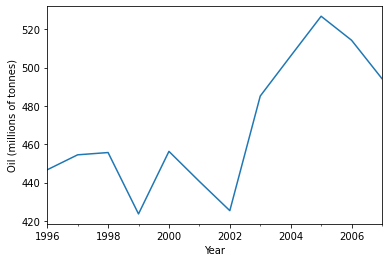

In [10]:
ax = oildata.plot()
ax.set_xlabel("Year")
ax.set_ylabel("Oil (millions of tonnes)")
print("Figure 7.1: Oil production in Saudi Arabia from 1996 to 2007.")

Here we run three variants of simple exponential smoothing:
1. In ```fit1``` we do not use the auto optimization but instead choose to explicitly provide the model with the $\alpha=0.2$ parameter
2. In ```fit2``` as above we choose an $\alpha=0.6$
3. In ```fit3``` we allow statsmodels to automatically find an optimized $\alpha$ value for us. This is <u>the recommended approach</u>.

In [11]:
fit1 = SimpleExpSmoothing(
                          oildata,
                          initialization_method="heuristic"
                          ).fit(smoothing_level=0.2,
                                optimized=False
                          )


# Forecast beyond 31st Dec, 2007
# For next three years:
fcast1 = fit1.forecast(3)
fcast1
print("\n===========\n")
type(fcast1)
print("\n===========\n")
fcast1 = fit1.forecast(3).rename(r"$\alpha=0.2$")
fcast1


2008-12-31    483.068515
2009-12-31    483.068515
2010-12-31    483.068515
Freq: A-DEC, dtype: float64

pandas.core.series.Series

2008-12-31    483.068515
2009-12-31    483.068515
2010-12-31    483.068515
Freq: A-DEC, Name: $\alpha=0.2$, dtype: float64

In [12]:
fit2 = SimpleExpSmoothing(
                          oildata,
                          initialization_method="heuristic"
                          ).fit(smoothing_level=0.6,
                                optimized=False
                                )

fcast2 = fit2.forecast(3).rename(r"$\alpha=0.6$")
fcast2

2008-12-31    501.837031
2009-12-31    501.837031
2010-12-31    501.837031
Freq: A-DEC, Name: $\alpha=0.6$, dtype: float64

In [13]:
fit3 = SimpleExpSmoothing(
                          oildata,
                          initialization_method="estimated"
                          ).fit()
                          
fcast3 = fit3.forecast(3).rename(r"$\alpha=%s$" % fit3.model.params["smoothing_level"])
fcast3

2008-12-31    496.49349
2009-12-31    496.49349
2010-12-31    496.49349
Freq: A-DEC, Name: $\alpha=0.8920002400624609$, dtype: float64

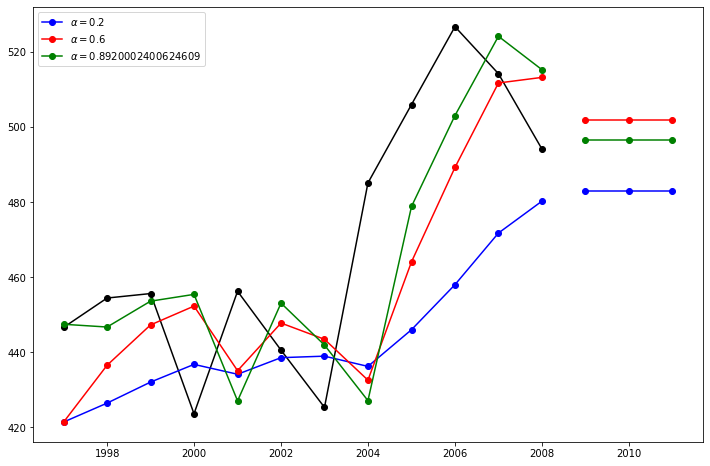

In [14]:
# Plot figures now:
plt.figure(figsize=(12, 8))

## Oil data 
# Original oil data
plt.plot(oildata, marker="o", color="black")

## alpha = 0.2
# Forecast fitted to existing time-values
plt.plot(fit1.fittedvalues, marker="o", color="blue")
# Forecasted valuse for next 3-years
_ = plt.plot(fcast1, marker="o", color="blue", label = fcast1.name)

## alpha = 0.6
plt.plot(fit2.fittedvalues, marker="o", color="red")
_ = plt.plot(fcast2, marker="o", color="red", label = fcast2.name )

## alpha: optimized
plt.plot(fit3.fittedvalues, marker="o", color="green")
_  = plt.plot(fcast3, marker="o", color="green", label = fcast3.name)

# Legend
plt.legend();

## Holt's Method

Lets take a look at another example.
This time we use air pollution data and the Holt's Method.
We will fit three examples again.
1. In ```fit1``` we again choose not to use the optimizer and provide explicit values for $\alpha=0.8$ and $\beta=0.2$
2. In ```fit2``` we do the same as in ```fit1``` but choose to use an exponential model rather than a Holt's additive model.
3. In ```fit3``` we used a damped versions of the Holt's additive model but allow the dampening parameter $\phi$ to be optimized while fixing the values for $\alpha=0.8$ and $\beta=0.2$

In [15]:
fit1 = Holt(
            air,
            initialization_method="estimated"
            ).fit(smoothing_level=0.8,
                  smoothing_trend=0.2,
                  optimized=False
                  )

fcast1 = fit1.forecast(5).rename("Holt's linear trend")
fcast1

2005-12-31    43.625006
2006-12-31    45.363183
2007-12-31    47.101359
2008-12-31    48.839536
2009-12-31    50.577713
Freq: A-DEC, Name: Holt's linear trend, dtype: float64

In [16]:
fit2 = Holt(
            air,
            exponential=True,
            initialization_method="estimated"
            ).fit(smoothing_level=0.8,
                  smoothing_trend=0.2,
                  optimized=False
                  )
            
fcast2 = fit2.forecast(5).rename("Exponential trend")
fcast2

2005-12-31    44.269806
2006-12-31    46.636686
2007-12-31    49.130110
2008-12-31    51.756845
2009-12-31    54.524018
Freq: A-DEC, Name: Exponential trend, dtype: float64

In [17]:
fit3 = Holt(
            air,
            damped_trend=True,
            initialization_method="estimated"
            ).fit(smoothing_level=0.8,
                  smoothing_trend=0.2
                  )

            
fcast3 = fit3.forecast(5).rename("Additive damped trend")
fcast3

2005-12-31    42.844716
2006-12-31    43.812170
2007-12-31    44.661540
2008-12-31    45.407238
2009-12-31    46.061918
Freq: A-DEC, Name: Additive damped trend, dtype: float64

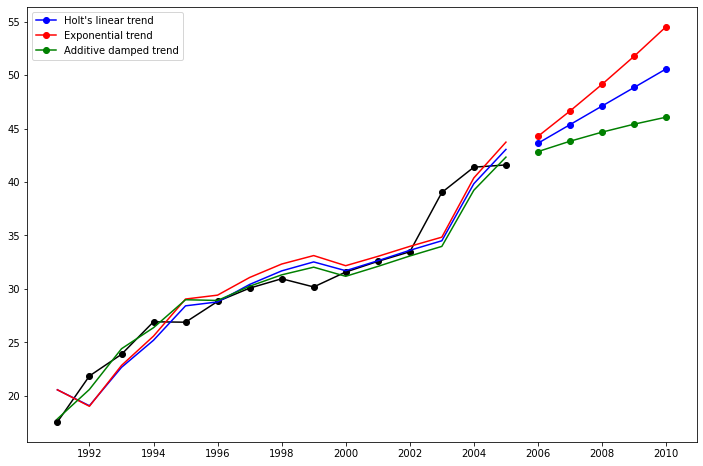

In [18]:
# Plot figures now:
plt.figure(figsize=(12, 8))

plt.plot(air, marker="o", color="black")
plt.plot(fit1.fittedvalues, color="blue")
_ = plt.plot(fcast1, marker="o", color="blue", label =fcast1.name)
plt.plot(fit2.fittedvalues, color="red")
_ = plt.plot(fcast2, marker="o", color="red", label =fcast2.name)
plt.plot(fit3.fittedvalues, color="green")
_ = plt.plot(fcast3, marker="o", color="green", label =fcast3.name)
plt.legend();

## Holt's method: Seasonally adjusted data
Lets look at some seasonally adjusted livestock data. We fit five Holt's models.
The below table allows us to compare results when we use exponential versus additive and damped versus non-damped.
 
Note: ```fit4``` does not allow the parameter $\phi$ to be optimized by providing a fixed value of $\phi=0.98$

In [29]:
fit1 = SimpleExpSmoothing(
                          livestock2,
                          initialization_method="estimated"
                          ).fit()

fit2 = Holt(
            livestock2,
            initialization_method="estimated"
            ).fit()

fit3 = Holt(
            livestock2,
            exponential=True,
            initialization_method="estimated"
            ).fit()

fit4 = Holt(
            livestock2,
            damped_trend=True,
            initialization_method="estimated"
            ).fit(damping_trend=0.98)


fit5 = Holt(
             livestock2,
             exponential=True,
             damped_trend=True,
             initialization_method="estimated"
             ).fit()
             

In [20]:
# From our fitted model, we will extract
#  values of these parameters:

params = [
          "smoothing_level",
          "smoothing_trend",
          "damping_trend",
          "initial_level",
          "initial_trend",
         ]

In [21]:
# This dataframe has no data:

results = pd.DataFrame(
                       index=[r"$\alpha$", r"$\beta$", r"$\phi$", r"$l_0$", "$b_0$", "SSE"],
                       columns=["SES", "Holt's", "Exponential", "Additive", "Multiplicative"],
                       )

results

,SES,Holt's,Exponential,Additive,Multiplicative
$\alpha$,NaN,NaN,NaN,NaN,NaN
$\beta$,NaN,NaN,NaN,NaN,NaN
$\phi$,NaN,NaN,NaN,NaN,NaN
$l_0$,NaN,NaN,NaN,NaN,NaN
$b_0$,NaN,NaN,NaN,NaN,NaN
SSE,NaN,NaN,NaN,NaN,NaN


Return values of `fit()` are explained [here](https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.HoltWintersResults.html#statsmodels.tsa.holtwinters.HoltWintersResults). One of the return values are `params`.

In [30]:
# fit1() returns a dict:

fit1.params

{'smoothing_level': 0.9999999850988388,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 263.9177031372617,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [31]:
# We can obtain value of one of the 
# parameters, as:
fit1.params["smoothing_level"]


0.9999999850988388

Another parameter returned by `fit()` is sse (sum of squared errors). See [here](https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.HoltWintersResults.html#statsmodels.tsa.holtwinters.HoltWintersResults).

In [32]:
# Sum of squared errors
fit1.sse

6761.350235004975

In [33]:
# A small experiment with blank dataframe:
# Blank DataFrame with just index and column name defined:

xyz = pd.DataFrame(index = [1,2,3], columns = ["mnp"])
xyz["mnp"] = [0.22,0.44,np.NaN]
xyz


,mnp
1,0.22
2,0.44
3,NaN


In [35]:
 [fit1.params[p] for p in params] + [fit1.sse]
 

[0.9999999850988388, nan, nan, 263.9177031372617, nan, 6761.350235004975]

In [37]:
# Similar to above, RHS is a list of 6-items:

[fit1.params[p] for p in params] + [fit1.sse]

print("\n=================\n")

results["SES"] = [fit1.params[p] for p in params] + [fit1.sse]
results["SES"]

[0.9999999850988388, nan, nan, 263.9177031372617, nan, 6761.350235004975]

$\alpha$       1.000000
$\beta$             NaN
$\phi$              NaN
$l_0$        263.917703
$b_0$               NaN
SSE         6761.350235
Name: SES, dtype: float64

In [38]:
# Similarly fill up other colmns of the DataFrame:

results["Holt's"] = [fit2.params[p] for p in params] + [fit2.sse]
results["Exponential"] = [fit3.params[p] for p in params] + [fit3.sse]
results["Additive"] = [fit4.params[p] for p in params] + [fit4.sse]
results["Multiplicative"] = [fit5.params[p] for p in params] + [fit5.sse]
results

,SES,Holt's,Exponential,Additive,Multiplicative
$\alpha$,1.000000,0.974338,0.977642,0.978843,0.974912
$\beta$,NaN,0.000000,0.000000,0.000008,0.000000
$\phi$,NaN,NaN,NaN,0.980000,0.981646
$l_0$,263.917703,258.882683,260.335599,257.357716,258.951817
$b_0$,NaN,5.010856,1.013780,6.645297,1.038144
SSE,6761.350235,6004.138207,6104.194782,6036.597169,6081.995045


### Plots of Seasonally Adjusted Data
The following plots allow us to evaluate the level and slope/trend components of the above table's fits.

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

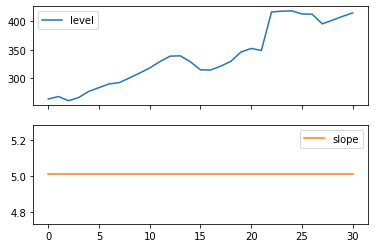

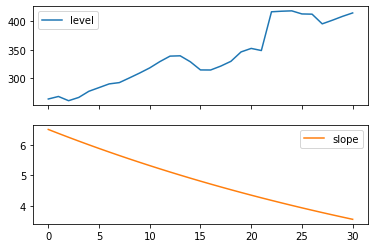

Figure 7.4: Level and slope components for Holt’s linear trend method and the additive damped trend method.


In [42]:
for fit in [fit2, fit4]:
    pd.DataFrame(
                  np.c_[fit.level,
                        fit.trend]
                 ).rename(
                           columns={0: "level", 1: "slope"}
                         ).plot(subplots=True);

plt.show() ;
print(
    "Figure 7.4: Level and slope components for Holt’s linear trend method and the additive damped trend method."
)

## Comparison
Here we plot a comparison Simple Exponential Smoothing and Holt's Methods for various additive, exponential and damped combinations. All of the models parameters will be optimized by statsmodels.

In [44]:
fit1 = SimpleExpSmoothing(
                          livestock2,
                          initialization_method="estimated"
                          ).fit()

fcast1 = fit1.forecast(9).rename("SES")

fit2 = Holt(
             livestock2,
             initialization_method="estimated"
             ).fit()

fcast2 = fit2.forecast(9).rename("Holt's")

fit3 = Holt(
            livestock2,
            exponential=True,
            initialization_method="estimated"
            ).fit()

fcast3 = fit3.forecast(9).rename("Exponential")


fit4 = Holt(
            livestock2,
            damped_trend=True,
            initialization_method="estimated"
            ).fit(
                 damping_trend=0.98
                  )
            
fcast4 = fit4.forecast(9).rename("Additive Damped")


fit5 = Holt(
             livestock2,
             exponential=True,
             damped_trend=True,
             initialization_method="estimated"
             ).fit()
             
fcast5 = fit5.forecast(9).rename("Multiplicative Damped")


<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

Text(0, 0.5, 'Livestock, sheep in Asia (millions)')

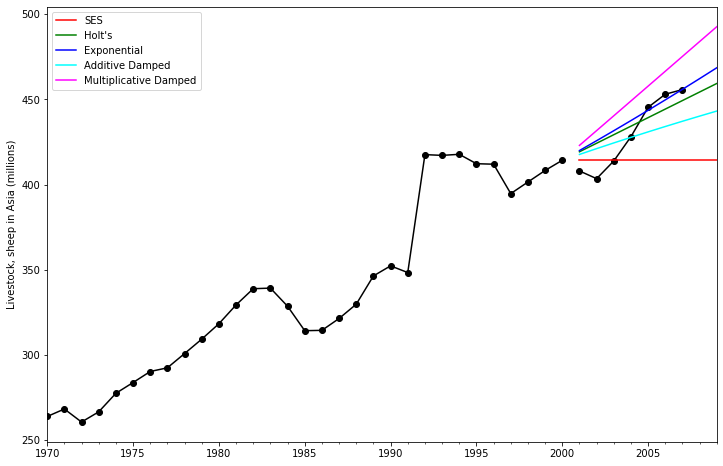

Figure 7.5: Forecasting livestock, sheep in Asia: comparing forecasting performance of non-seasonal methods.


In [45]:
# Plot the forecasts:

ax = livestock2.plot(color="black", marker="o", figsize=(12, 8))
livestock3.plot(ax=ax, color="black", marker="o", legend=False)

fcast1.plot(ax=ax, color="red", legend=True)
fcast2.plot(ax=ax, color="green", legend=True)
fcast3.plot(ax=ax, color="blue", legend=True)
fcast4.plot(ax=ax, color="cyan", legend=True)
fcast5.plot(ax=ax, color="magenta", legend=True)
ax.set_ylabel("Livestock, sheep in Asia (millions)")
plt.show()
print(
    "Figure 7.5: Forecasting livestock, sheep in Asia: comparing forecasting performance of non-seasonal methods."
)

## Holt's Winters Seasonal
Finally we are able to run full Holt's Winters Seasonal Exponential Smoothing  including a trend component and a seasonal component.
statsmodels allows for all the combinations including as shown in the examples below:
1. ```fit1``` additive trend, additive seasonal of period ```season_length=4``` and the use of a Box-Cox transformation.
1. ```fit2``` additive trend, multiplicative seasonal of period ```season_length=4``` and the use of a Box-Cox transformation..
1. ```fit3``` additive damped trend, additive seasonal of period ```season_length=4``` and the use of a Box-Cox transformation.
1. ```fit4``` additive damped trend, multiplicative seasonal of period ```season_length=4``` and the use of a Box-Cox transformation.

The plot shows the results and forecast for ```fit1``` and ```fit2```.
The table allows us to compare the results and parameterizations.

In [46]:
fit1 = ExponentialSmoothing(
                            aust,
                            seasonal_periods=4,
                            trend="add",
                            seasonal="add",
                            use_boxcox=True,
                            initialization_method="estimated",
                            ).fit()


fit2 = ExponentialSmoothing(
                            aust,
                            seasonal_periods=4,
                            trend="add",
                            seasonal="mul",
                            use_boxcox=True,
                            initialization_method="estimated",
                            ).fit()

fit3 = ExponentialSmoothing(
                            aust,
                            seasonal_periods=4,
                            trend="add",
                            seasonal="add",
                            damped_trend=True,
                            use_boxcox=True,
                            initialization_method="estimated",
                            ).fit()

fit4 = ExponentialSmoothing(
                            aust,
                            seasonal_periods=4,
                            trend="add",
                            seasonal="mul",
                            damped_trend=True,
                            use_boxcox=True,
                            initialization_method="estimated",
                            ).fit()



In [47]:
results = pd.DataFrame(
                        index=[r"$\alpha$", r"$\beta$", r"$\phi$", r"$\gamma$", r"$l_0$", "$b_0$", "SSE"]
                      )

results

""
$\alpha$
$\beta$
$\phi$
$\gamma$
$l_0$
$b_0$
SSE


In [49]:
params = [
           "smoothing_level",
           "smoothing_trend",
           "damping_trend",
           "smoothing_seasonal",
           "initial_level",
           "initial_trend",
         ]

In [51]:
# Fill up results:
results["Additive"] = [fit1.params[p] for p in params] + [fit1.sse]
results["Multiplicative"] = [fit2.params[p] for p in params] + [fit2.sse]
results["Additive Dam"] = [fit3.params[p] for p in params] + [fit3.sse]
results["Multiplica Dam"] = [fit4.params[p] for p in params] + [fit4.sse]
results

,Additive,Multiplicative,Additive Dam,Multiplica Dam
$\alpha$,1.490116e-08,1.490116e-08,1.490116e-08,1.490116e-08
$\beta$,1.409862e-08,3.449544e-23,6.490775e-09,5.042224e-09
$\phi$,NaN,NaN,9.430416e-01,9.536044e-01
$\gamma$,1.829110e-16,2.550777e-15,3.872323e-16,5.847315e-16
$l_0$,1.119347e+01,1.106378e+01,1.084021e+01,9.899276e+00
$b_0$,1.205396e-01,1.198959e-01,2.456749e-01,1.975442e-01
SSE,4.402746e+01,3.611262e+01,3.527619e+01,3.062033e+01


Text(0, 0.5, 'International visitor night in Australia (millions)')

Text(0.5, 0, 'Year')

<AxesSubplot:title={'center':"Forecasts from Holt-Winters' multiplicative method"}, xlabel='Year', ylabel='International visitor night in Australia (millions)'>

<AxesSubplot:title={'center':"Forecasts from Holt-Winters' multiplicative method"}, xlabel='Year', ylabel='International visitor night in Australia (millions)'>

<AxesSubplot:title={'center':"Forecasts from Holt-Winters' multiplicative method"}, xlabel='Year', ylabel='International visitor night in Australia (millions)'>

<AxesSubplot:title={'center':"Forecasts from Holt-Winters' multiplicative method"}, xlabel='Year', ylabel='International visitor night in Australia (millions)'>

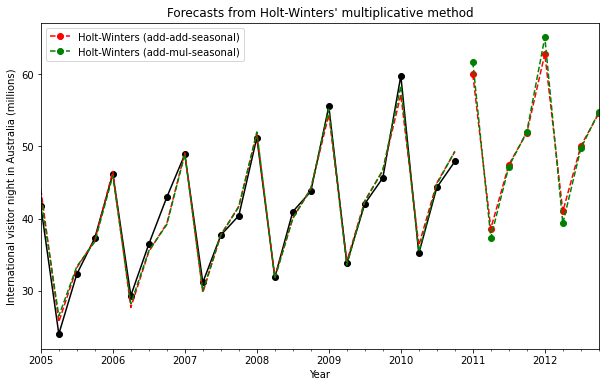

Figure 7.6: Forecasting international visitor nights in Australia using Holt-Winters method with both additive and multiplicative seasonality.


,Additive,Multiplicative,Additive Dam,Multiplica Dam
$\alpha$,1.490116e-08,1.490116e-08,1.490116e-08,1.490116e-08
$\beta$,1.409862e-08,3.449544e-23,6.490775e-09,5.042224e-09
$\phi$,NaN,NaN,9.430416e-01,9.536044e-01
$\gamma$,1.829110e-16,2.550777e-15,3.872323e-16,5.847315e-16
$l_0$,1.119347e+01,1.106378e+01,1.084021e+01,9.899276e+00
$b_0$,1.205396e-01,1.198959e-01,2.456749e-01,1.975442e-01
SSE,4.402746e+01,3.611262e+01,3.527619e+01,3.062033e+01


In [53]:
# Plot now

ax = aust.plot(
                figsize=(10, 6),
                marker="o",
                color="black",
                title="Forecasts from Holt-Winters' multiplicative method",
               );

ax.set_ylabel("International visitor night in Australia (millions)")
ax.set_xlabel("Year")

fit1.fittedvalues.plot(ax=ax, style="--", color="red");
fit2.fittedvalues.plot(ax=ax, style="--", color="green");

fit1.forecast(8).rename("Holt-Winters (add-add-seasonal)").plot(
                                                                 ax=ax,
                                                                 style="--",
                                                                 marker="o",
                                                                 color="red",
                                                                 legend=True
                                                                );

fit2.forecast(8).rename("Holt-Winters (add-mul-seasonal)").plot(
                                                                 ax=ax,
                                                                 style="--",
                                                                 marker="o",
                                                                 color="green",
                                                                 legend=True
                                                                );

plt.show() ;
print(
    "Figure 7.6: Forecasting international visitor nights in Australia using Holt-Winters method with both additive and multiplicative seasonality."
)

results

# Simulations and Confidence Intervals

By using a state space formulation, we can perform simulations of future values. The mathematical details are described in Hyndman and Athanasopoulos [2] and in the documentation of `HoltWintersResults.simulate`.

Similar to the example in [2], we use the model with additive trend, multiplicative seasonality, and multiplicative error. We simulate up to 8 steps into the future, and perform 1000 simulations. As can be seen in the below figure, the simulations match the forecast values quite well.

[2] [Hyndman, Rob J., and George Athanasopoulos. Forecasting: principles and practice, 2nd edition. OTexts, 2018.](https://otexts.com/fpp2/ets.html)

Text(0, 0.5, 'International visitor night in Australia (millions)')

Text(0.5, 0, 'Year')

<AxesSubplot:title={'center':"Forecasts and simulations from Holt-Winters' multiplicative method"}, xlabel='Year', ylabel='International visitor night in Australia (millions)'>

<AxesSubplot:title={'center':"Forecasts and simulations from Holt-Winters' multiplicative method"}, xlabel='Year', ylabel='International visitor night in Australia (millions)'>

<AxesSubplot:title={'center':"Forecasts and simulations from Holt-Winters' multiplicative method"}, xlabel='Year', ylabel='International visitor night in Australia (millions)'>

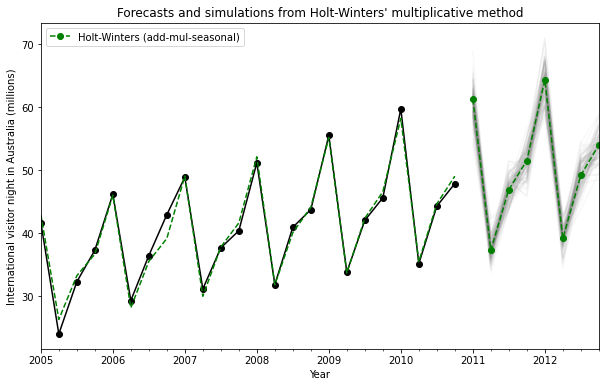

In [54]:
fit = ExponentialSmoothing(
                            aust,
                            seasonal_periods=4,
                            trend="add",
                            seasonal="mul",
                            initialization_method="estimated",
                           ).fit()

simulations = fit.simulate(8, repetitions=100, error="mul")

ax = aust.plot(
               figsize=(10, 6),
               marker="o",
               color="black",
               title="Forecasts and simulations from Holt-Winters' multiplicative method",
               )

ax.set_ylabel("International visitor night in Australia (millions)")
ax.set_xlabel("Year")

fit.fittedvalues.plot(ax=ax, style="--", color="green")

simulations.plot(ax=ax, style="-", alpha=0.05, color="grey", legend=False)

fit.forecast(8).rename("Holt-Winters (add-mul-seasonal)").plot(
                                                                ax=ax,
                                                                style="--",
                                                                marker="o",
                                                                color="green",
                                                                legend=True
                                                               );
plt.show()

Simulations can also be started at different points in time, and there are multiple options for choosing the random noise.

Text(0, 0.5, 'International visitor night in Australia (millions)')

Text(0.5, 0, 'Year')

<AxesSubplot:title={'center':"Forecasts and simulations from Holt-Winters' multiplicative method"}, xlabel='Year', ylabel='International visitor night in Australia (millions)'>

<AxesSubplot:title={'center':"Forecasts and simulations from Holt-Winters' multiplicative method"}, xlabel='Year', ylabel='International visitor night in Australia (millions)'>

<AxesSubplot:title={'center':"Forecasts and simulations from Holt-Winters' multiplicative method"}, xlabel='Year', ylabel='International visitor night in Australia (millions)'>

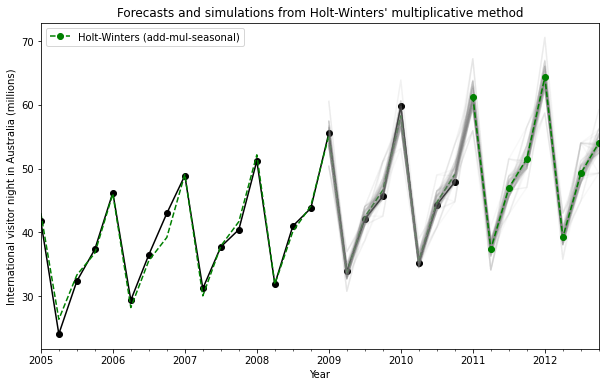

In [55]:
fit = ExponentialSmoothing(
                           aust,
                           seasonal_periods=4,
                           trend="add",
                           seasonal="mul",
                           initialization_method="estimated",
                           ).fit()

simulations = fit.simulate(16,
                           anchor="2009-01-01",
                           repetitions=100,
                           error="mul",
                           random_errors="bootstrap"
                           )


ax = aust.plot(
               figsize=(10, 6),
               marker="o",
               color="black",
               title="Forecasts and simulations from Holt-Winters' multiplicative method",
               )

ax.set_ylabel("International visitor night in Australia (millions)")
ax.set_xlabel("Year")

fit.fittedvalues.plot(
                      ax=ax,
                      style="--",
                      color="green"
                      )

simulations.plot(
                 ax=ax,
                 style="-",
                 alpha=0.05,
                 color="grey",
                 legend=False
                 )


fit.forecast(8).rename("Holt-Winters (add-mul-seasonal)").plot(
                                                                ax=ax,
                                                                style="--",
                                                                marker="o",
                                                                color="green",
                                                                legend=True
                                                               )

plt.show()

In [ ]:
########## I am done #############